In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [10]:
dataset = pd.read_csv('Placement_Data_Full_Class.csv')

In [11]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000


In [28]:
dataset = dataset.loc[dataset["salary"] != 0]
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,Placed,252000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,M,62.00,Central,72.00,Central,Commerce,65.00,Comm&Mgmt,No,67.0,Mkt&Fin,56.49,Placed,216000
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000


In [26]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000


In [16]:
# as sl_no columns are not required for placement status prediction so we drop it
dataset.drop(['sl_no'], axis=1, inplace=True)


KeyError: "['sl_no'] not found in axis"

In [17]:
dataset

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [18]:
# missing values checking
dataset.isnull().sum()
dataset

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [19]:
# checking column values data type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          215 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


# Label Encoding Data

In [20]:
# label encoding needs to be done to ensure all values in the dataset is numeric
# hsc_s, degree_t columns needs to be splitted into columns (get_dummies needs to be applied)
features_to_split = ['hsc_s','degree_t']
for feature in features_to_split:
    dummy = pd.get_dummies(dataset[feature])
    dataset = pd.concat([dataset, dummy], axis=1)
    dataset.drop(feature, axis=1, inplace=True)


In [23]:
dataset

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,salary,Arts,Commerce,Science,Comm&Mgmt,Others,Sci&Tech
0,M,67.00,Others,91.00,Others,58.00,No,55.0,Mkt&HR,58.80,Placed,270000.0,0,1,0,0,0,1
1,M,79.33,Central,78.33,Others,77.48,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,0,0,1,0,0,1
2,M,65.00,Central,68.00,Central,64.00,No,75.0,Mkt&Fin,57.80,Placed,250000.0,1,0,0,1,0,0
3,M,56.00,Central,52.00,Central,52.00,No,66.0,Mkt&HR,59.43,Not Placed,0.0,0,0,1,0,0,1
4,M,85.80,Central,73.60,Central,73.30,No,96.8,Mkt&Fin,55.50,Placed,425000.0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,77.60,No,91.0,Mkt&Fin,74.49,Placed,400000.0,0,1,0,1,0,0
211,M,58.00,Others,60.00,Others,72.00,No,74.0,Mkt&Fin,53.62,Placed,275000.0,0,0,1,0,0,1
212,M,67.00,Others,67.00,Others,73.00,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0,0,1,0,1,0,0
213,F,74.00,Others,66.00,Others,58.00,No,70.0,Mkt&HR,60.23,Placed,204000.0,0,1,0,1,0,0


In [24]:
dataset.rename(columns={"Others": "Other_Degree"},inplace=True)

In [25]:
dataset

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,salary,Arts,Commerce,Science,Comm&Mgmt,Other_Degree,Sci&Tech
0,M,67.00,Others,91.00,Others,58.00,No,55.0,Mkt&HR,58.80,Placed,270000.0,0,1,0,0,0,1
1,M,79.33,Central,78.33,Others,77.48,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,0,0,1,0,0,1
2,M,65.00,Central,68.00,Central,64.00,No,75.0,Mkt&Fin,57.80,Placed,250000.0,1,0,0,1,0,0
3,M,56.00,Central,52.00,Central,52.00,No,66.0,Mkt&HR,59.43,Not Placed,0.0,0,0,1,0,0,1
4,M,85.80,Central,73.60,Central,73.30,No,96.8,Mkt&Fin,55.50,Placed,425000.0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,77.60,No,91.0,Mkt&Fin,74.49,Placed,400000.0,0,1,0,1,0,0
211,M,58.00,Others,60.00,Others,72.00,No,74.0,Mkt&Fin,53.62,Placed,275000.0,0,0,1,0,0,1
212,M,67.00,Others,67.00,Others,73.00,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0,0,1,0,1,0,0
213,F,74.00,Others,66.00,Others,58.00,No,70.0,Mkt&HR,60.23,Placed,204000.0,0,1,0,1,0,0


In [27]:
encoder = LabelEncoder() # to encode string to the values like 0,1,2 etc.
columns_to_encode = ['gender','ssc_b', 'hsc_b','workex','specialisation','status']
for column in columns_to_encode:
    dataset[column] = encoder.fit_transform(dataset[column])
dataset

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,salary,Arts,Commerce,Science,Comm&Mgmt,Other_Degree,Sci&Tech
0,1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,1,270000.0,0,1,0,0,0,1
1,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,1,200000.0,0,0,1,0,0,1
2,1,65.00,0,68.00,0,64.00,0,75.0,0,57.80,1,250000.0,1,0,0,1,0,0
3,1,56.00,0,52.00,0,52.00,0,66.0,1,59.43,0,0.0,0,0,1,0,0,1
4,1,85.80,0,73.60,0,73.30,0,96.8,0,55.50,1,425000.0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,77.60,0,91.0,0,74.49,1,400000.0,0,1,0,1,0,0
211,1,58.00,1,60.00,1,72.00,0,74.0,0,53.62,1,275000.0,0,0,1,0,0,1
212,1,67.00,1,67.00,1,73.00,1,59.0,0,69.72,1,295000.0,0,1,0,1,0,0
213,0,74.00,1,66.00,1,58.00,0,70.0,1,60.23,1,204000.0,0,1,0,1,0,0


In [28]:
dataset.describe()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,salary,Arts,Commerce,Science,Comm&Mgmt,Other_Degree,Sci&Tech
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,0.646512,67.303395,0.460465,66.333163,0.609302,66.370186,0.344186,72.100558,0.441860,62.278186,0.688372,198702.325581,0.051163,0.525581,0.423256,0.674419,0.051163,0.274419
std,0.479168,10.827205,0.499598,10.897509,0.489045,7.358743,0.476211,13.275956,0.497767,5.833385,0.464240,154780.926716,0.220844,0.500510,0.495228,0.469685,0.220844,0.447262
min,0.000000,40.890000,0.000000,37.000000,0.000000,50.000000,0.000000,50.000000,0.000000,51.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,60.600000,0.000000,60.900000,0.000000,61.000000,0.000000,60.000000,0.000000,57.945000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,67.000000,0.000000,65.000000,1.000000,66.000000,0.000000,71.000000,0.000000,62.000000,1.000000,240000.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,75.700000,1.000000,73.000000,1.000000,72.000000,1.000000,83.500000,1.000000,66.255000,1.000000,282500.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,89.400000,1.000000,97.700000,1.000000,91.000000,1.000000,98.000000,1.000000,77.890000,1.000000,940000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Checking for Outliers

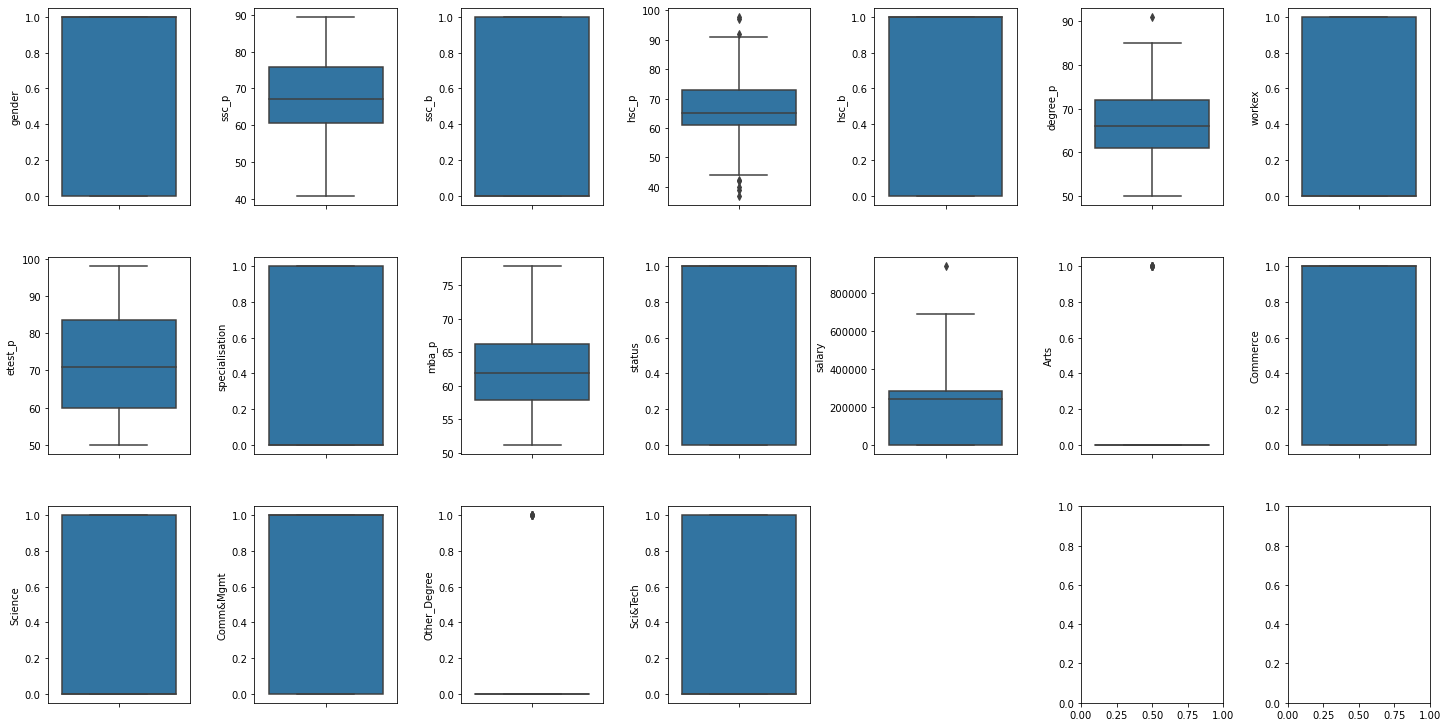

In [34]:
fig, axs = plt.subplots(ncols=7,nrows=3,figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in dataset.items():
    sns.boxplot(y=v, ax=axs[index])
    index+=1

fig.delaxes(axs[index])
plt.tight_layout(pad=0.3, w_pad=0.5,h_pad = 4.5) # for styling by giving padding

In [35]:
# deleting some outliers in 2 columns degree_p and hsc_p
dataset = dataset[~(dataset['degree_p']>=90)]
dataset = dataset[~(dataset['hsc_p']>=95)]

Checking for Correlation

In [36]:
dataset.corr()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,salary,Arts,Commerce,Science,Comm&Mgmt,Other_Degree,Sci&Tech
gender,1.000000,-0.059818,0.017052,-0.022187,0.074438,-0.154679,0.093325,0.081765,-0.103355,-0.298466,0.098189,0.166046,-0.096386,0.001870,0.041426,-0.036801,-0.096386,0.086960
ssc_p,-0.059818,1.000000,0.107995,0.528111,0.056672,0.528753,0.183073,0.264009,-0.177436,0.377438,0.605381,0.540438,-0.194514,-0.093283,0.181772,-0.168282,-0.063459,0.208907
ssc_b,0.017052,0.107995,1.000000,-0.140332,0.608493,0.020828,-0.027916,-0.018739,-0.057356,0.074653,0.033717,0.041029,-0.001410,-0.042586,0.043708,-0.078842,-0.001410,0.083707
hsc_p,-0.022187,0.528111,-0.140332,1.000000,-0.038259,0.443595,0.135144,0.208809,-0.222405,0.335610,0.499777,0.429875,-0.074931,0.267073,-0.236466,0.121441,-0.132137,-0.061747
hsc_b,0.074438,0.056672,0.608493,-0.038259,1.000000,0.043618,0.039061,0.031316,0.004762,0.073936,0.009393,-0.005080,-0.114855,-0.069985,0.122407,-0.019492,-0.114855,0.077977
degree_p,-0.154679,0.528753,0.020828,0.443595,0.043618,1.000000,0.135100,0.226353,-0.232618,0.376261,0.479557,0.394928,-0.153777,-0.005676,0.074850,-0.004369,-0.180476,0.094883
workex,0.093325,0.183073,-0.027916,0.135144,0.039061,0.135100,1.000000,0.052862,-0.187200,0.174951,0.279091,0.293175,0.054259,-0.070916,0.047346,-0.118781,0.009501,0.120296
etest_p,0.081765,0.264009,-0.018739,0.208809,0.031316,0.226353,0.052862,1.000000,-0.222765,0.203663,0.122770,0.168243,-0.073539,-0.023192,0.056508,-0.010486,0.009482,0.006296
specialisation,-0.103355,-0.177436,-0.057356,-0.222405,0.004762,-0.232618,-0.187200,-0.222765,1.000000,-0.100456,-0.251043,-0.269372,-0.080368,-0.126684,0.164258,-0.098640,0.090868,0.058387
mba_p,-0.298466,0.377438,0.074653,0.335610,0.073936,0.376261,0.174951,0.203663,-0.100456,1.000000,0.063197,0.111931,0.009640,-0.040704,0.036839,-0.087109,-0.031441,0.107435


<AxesSubplot:>

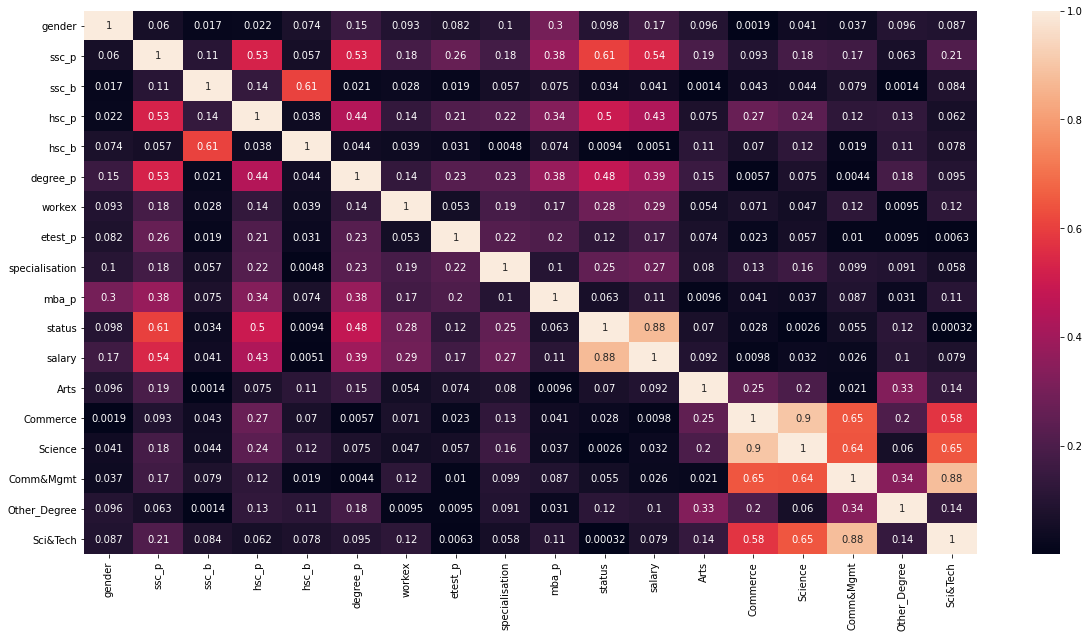

In [37]:
# heatmap for checking correlation or linearity

plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr().abs(), annot=True)

In [38]:
dataset.shape

(212, 18)

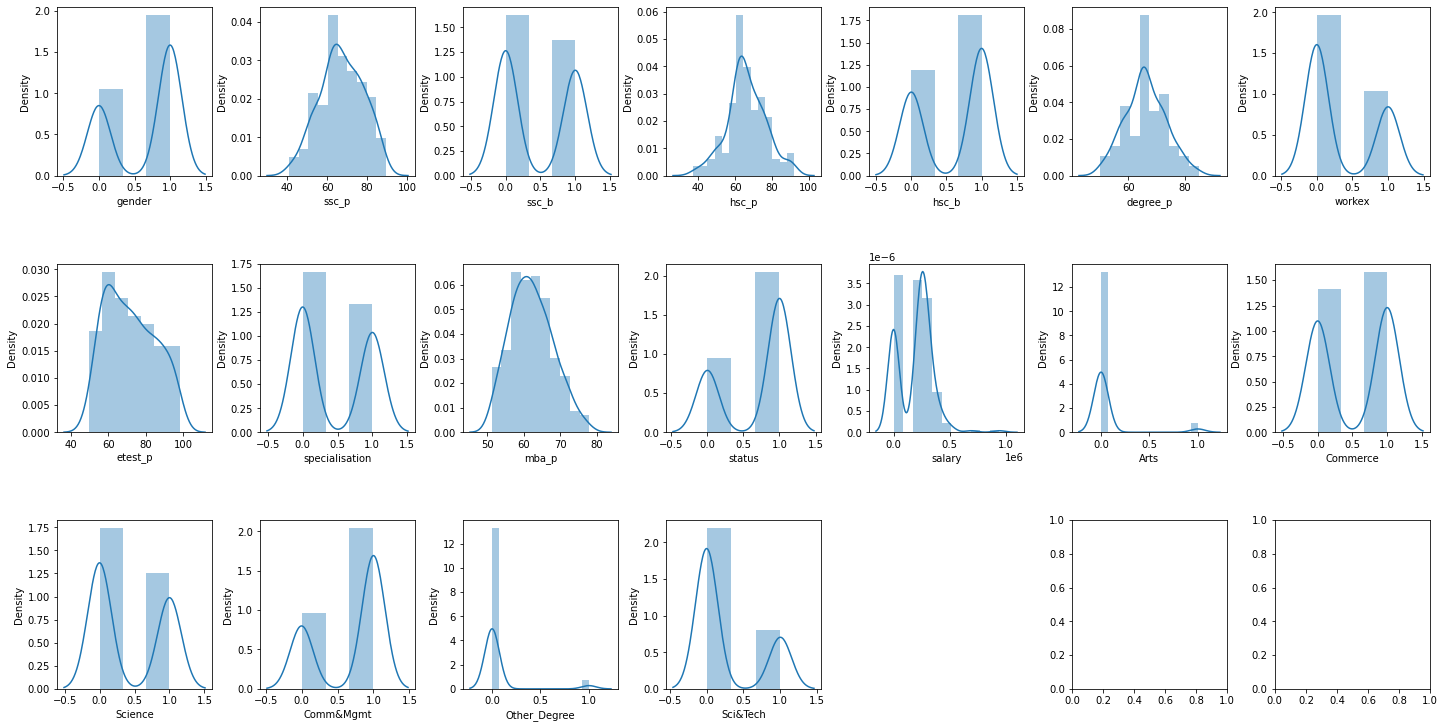

In [41]:
# checking distributions of all features
fig, axs = plt.subplots(ncols=7,nrows=3,figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in dataset.items():
    sns.distplot(v, ax=axs[index])
    index+=1

fig.delaxes(axs[index]) # deleting the 18th figure
plt.tight_layout(pad=0.3, w_pad=0.2,h_pad = 4.5)